# Кластеризация

## Исследование датасета по клиентам немецкого банка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

np.random.seed(100)

In [2]:
data = pd.read_csv("german_credit_data.csv")

## EDA

In [3]:
data.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Нужно будет удалить столбец Unnamed: 0 и заполнить пустые значения в столбцах Saving accounts и Checking account

In [5]:
data['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

Из описания датасета:

0 — неквалифированные работники-мигранты

1 — неквалифированные работники

2 — квалифированные работники

3 — высококвалифированные работники

In [6]:
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [8]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [9]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [10]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

Преобразуем столбцы Sex, Saving accounts, Checking account к числовому виду

In [11]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

Пустые значения меняем на 0, т.е. отсутствие денег в долгосрочных сбережениях и на текущем счёте

In [12]:
data['Saving accounts'] = data['Saving accounts'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4})

In [13]:
data['Checking account'] = data['Checking account'].map({np.nan: 0, 'little': 1, 'moderate': 2, 'rich': 3})

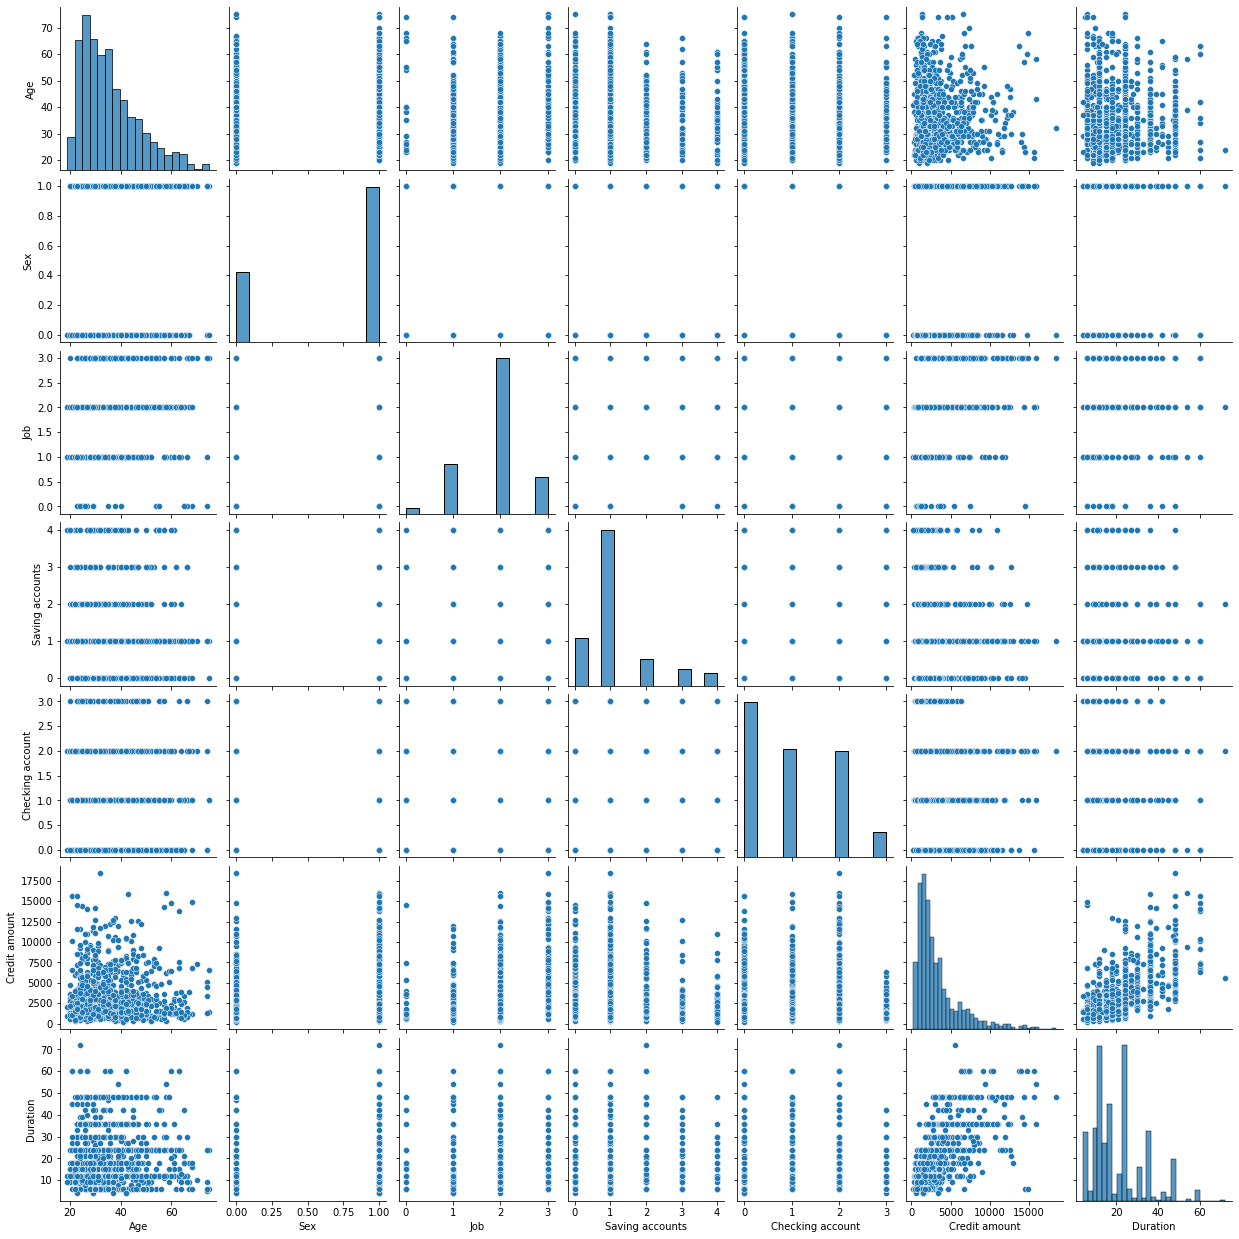

In [14]:
sns.pairplot(data)

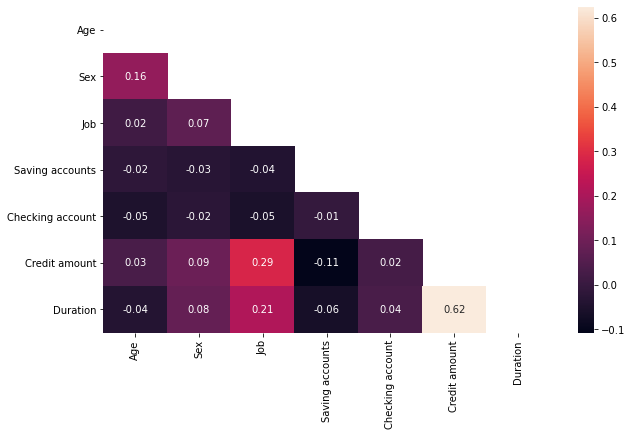

In [15]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

Высокая корреляция присутствует между размером кредита и его сроком

Преобразуем столбцы Housing, Purpose в фиктивные переменные

In [16]:
data = pd.get_dummies(data, columns=['Housing'], prefix='housing')

In [17]:
data = pd.get_dummies(data, columns=['Purpose'], prefix='purpose')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Sex                          1000 non-null   int64
 2   Job                          1000 non-null   int64
 3   Saving accounts              1000 non-null   int64
 4   Checking account             1000 non-null   int64
 5   Credit amount                1000 non-null   int64
 6   Duration                     1000 non-null   int64
 7   housing_free                 1000 non-null   uint8
 8   housing_own                  1000 non-null   uint8
 9   housing_rent                 1000 non-null   uint8
 10  purpose_business             1000 non-null   uint8
 11  purpose_car                  1000 non-null   uint8
 12  purpose_domestic appliances  1000 non-null   uint8
 13  purpose_education            1000 non-null   uint

In [19]:
data.head(10)

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,67,1,2,0,1,1169,6,0,1,0,0,0,0,0,0,1,0,0
1,22,0,2,1,2,5951,48,0,1,0,0,0,0,0,0,1,0,0
2,49,1,1,1,0,2096,12,0,1,0,0,0,0,1,0,0,0,0
3,45,1,2,1,1,7882,42,1,0,0,0,0,0,0,1,0,0,0
4,53,1,2,1,1,4870,24,1,0,0,0,1,0,0,0,0,0,0
5,35,1,1,0,0,9055,36,1,0,0,0,0,0,1,0,0,0,0
6,53,1,2,3,0,2835,24,0,1,0,0,0,0,0,1,0,0,0
7,35,1,3,1,2,6948,36,0,0,1,0,1,0,0,0,0,0,0
8,61,1,1,4,0,3059,12,0,1,0,0,0,0,0,0,1,0,0
9,28,1,3,1,2,5234,30,0,1,0,0,1,0,0,0,0,0,0


## Scaling

Масштабирование данных требуется для того, чтобы все признаки имели потенциально одинаковое влияние на выделение кластеров

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,housing_free,housing_own,housing_rent,purpose_business,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,purpose_vacation/others
0,0.857143,1.0,0.666667,0.00,0.333333,0.050567,0.029412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.053571,0.0,0.666667,0.25,0.666667,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.535714,1.0,0.333333,0.25,0.000000,0.101574,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.464286,1.0,0.666667,0.25,0.333333,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.607143,1.0,0.666667,0.25,0.333333,0.254209,0.294118,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dimensionality reducing

Поэкспериментируем с разными техниками уменьшения размерности: TSNE, PCA, UMAP

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne.shape

(1000, 2)

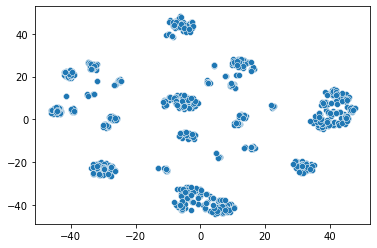

In [23]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=10)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1000, 2)

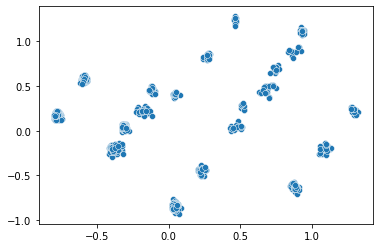

In [25]:
sns.scatterplot(X_pca[:,0], X_pca[:,1]);

In [26]:
import umap.umap_ as umap
umap_reducer = umap.UMAP()
X_umap = umap_reducer.fit_transform(X_scaled)
X_umap.shape

(1000, 2)

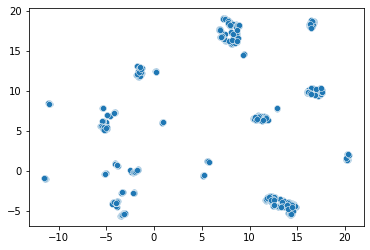

In [27]:
sns.scatterplot(X_umap[:,0], X_umap[:,1]);

## Maching Learning

In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

### KMeans

Построим график зависимости критерия инерции (функции потерь) от числа кластеров

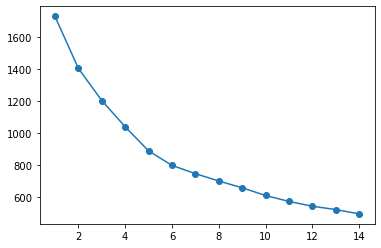

In [30]:
inertia = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=10, n_jobs=-1).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)
plt.plot(range(1,15), inertia, marker='o');

Очевидного локтя нет, но, кажется, оптимальное число кластеров в районе 6.

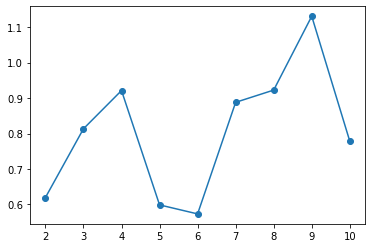

In [31]:
D = []
for i in range(1,10):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
plt.plot(range(2,11), D, marker='o');

На графике переломного момента, действительно, оптимальное число кластеров 6.

Визуализируем кластеры с помощью TSNE (в данном случае наиболее нагляден), PCA и UMAP

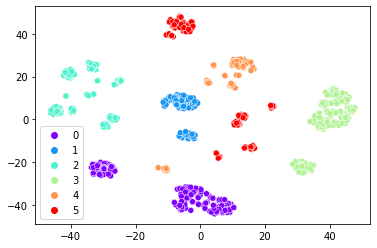

In [32]:
kmeans = KMeans(n_clusters=6, random_state=10).fit(X_scaled)
labels = kmeans.labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

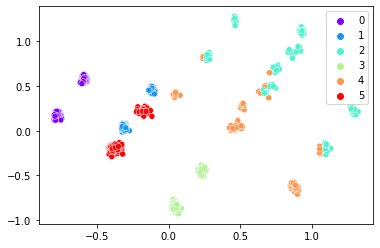

In [33]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

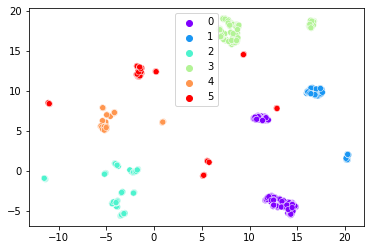

In [34]:
sns.scatterplot(X_umap[:,0], X_umap[:,1], hue=labels, palette='rainbow');

Распределение меток в кластерах

In [35]:
data['labels'] = labels
data['labels'].value_counts(normalize=True).sort_index()

0    0.227
1    0.122
2    0.179
3    0.219
4    0.108
5    0.145
Name: labels, dtype: float64

Построим боксплоты для непрерывно меняющихся признаков (возраста, размера кредита и срока кредита)

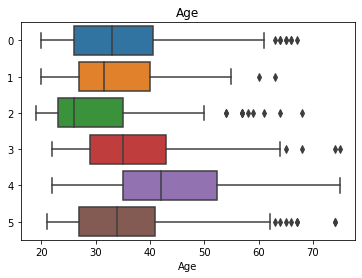

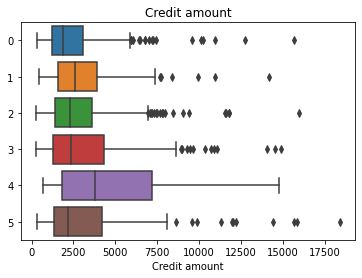

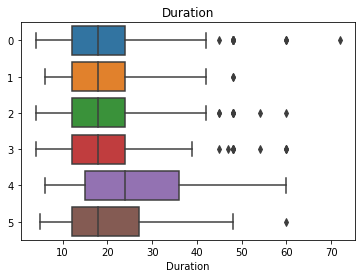

In [36]:
for col in ('Age','Credit amount','Duration'):
    sns.boxplot(data=data, x=data[col], y=labels, orient='h')
    plt.title(col)
    plt.show();

Вычислим для них же точные медианные значения

In [37]:
data[['Age','Credit amount','Duration','labels']].groupby('labels').median()

,Age,Credit amount,Duration
labels,,,
0,33.0,1898.0,18.0
1,31.5,2618.0,18.0
2,26.0,2301.0,18.0
3,35.0,2325.0,18.0
4,42.0,3800.5,24.0
5,34.0,2169.0,18.0


Для всех остальных стоблцов построим распределение значений по кластерам

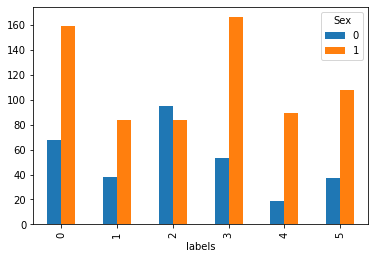

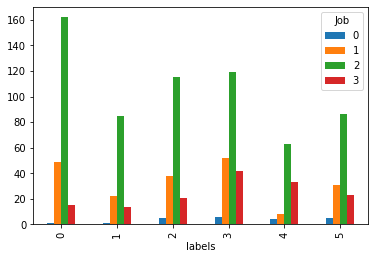

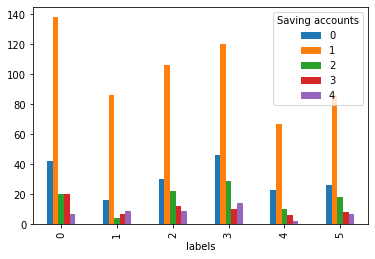

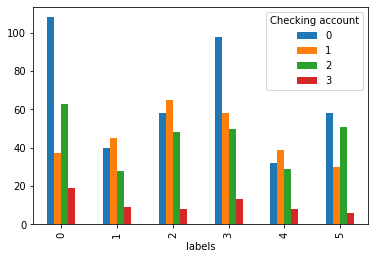

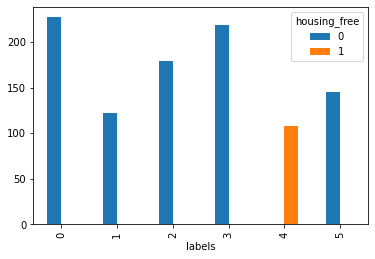

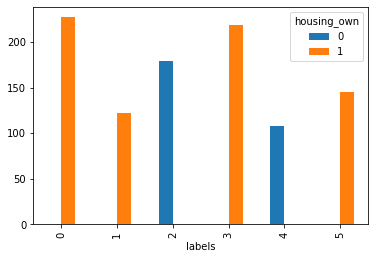

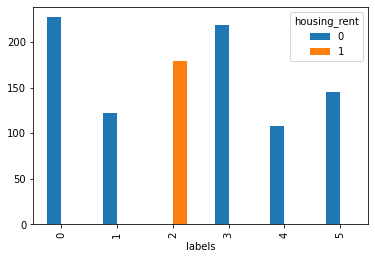

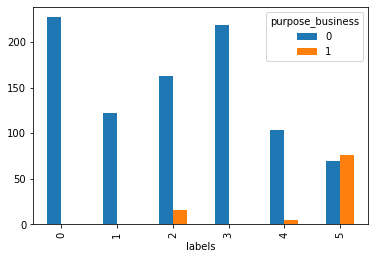

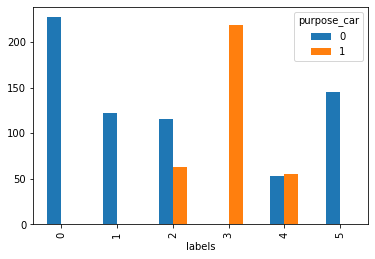

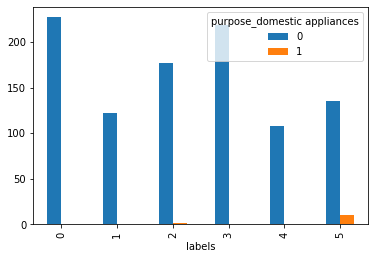

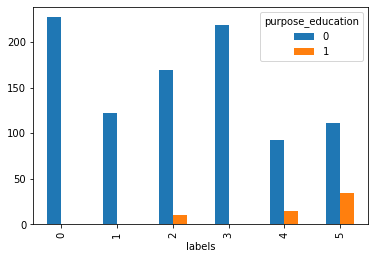

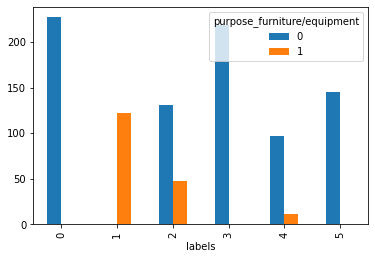

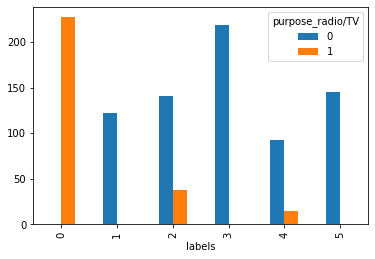

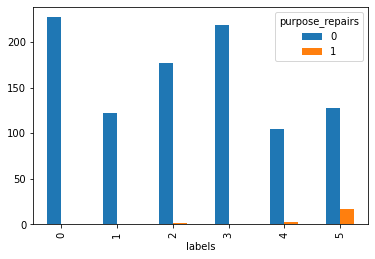

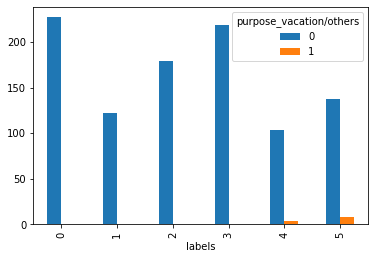

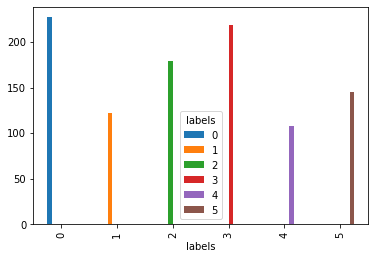

In [38]:
for col in data.columns.drop(['Age','Credit amount','Duration']):
    temp = data.groupby('labels')[col].value_counts().unstack()
    temp.plot.bar()

**Интерпретация KMeans**

| Метка | Возраст | Пол | Работа | Жильё | Сбережения | Счёт | Размер кредита | Срок кредита | Цель кредита |
|-|-|-|-|-|-|-|-|-|-|
| 0 | 25—40 | Больше М | Норм. | Собственность | Норм. | Распр. 2 | 1900 | 18 | Радио / телевизор |
| 1 | 26—39 | Больше М | Норм. | Собственность | Норм. | Распр. 1 | 2600 | 18 | Мебель |
| 2 | 23—35 | Больше Ж | Норм. | Аренда | Норм. | Распр. 1 | 2300 | 18 | Разные |
| 3 | 28—43 | Больше М | Норм. | Собственность | Норм. | Распр. 3 | 2300 | 18 | Автомобиль |
| 4 | 36—52 | Почти все М | Особое | Нет | Норм. | Распр. 1 | 3800 | 24 | Разные |
| 5 | 27—41 | Больше М | Норм. | Собственность | Норм. | Распр. 2 | 2200 | 18 | Бизнес, образование |

Работа:
* Норм.: распределение соответствует общему распределению выборки с преобладание квалифицированных работников
* Особое: в распределении преобладают квалифицированные работники, но по сравнению с другими метками сильно повышена доля высококвалифицированных

Сбережения:
* Норм.: распределение соответствует общему распределению выборки с преобладанием малого размера сбережений
* Особое.: распределение как нормальное, но с особо значимой долей высоких размеров сбережений

Счёт:
* Распр. 1: преобладает малый размер счёта, нулевых счетов чуть больше средних
* Распр. 2: преобладает нулевой размер счёта, средних больше чем малых
* Распр. 3: преобладает нулевой размер счёта, малых больше чем средних

**Характеристика меток:**

0. Собственники жилья среднего возраста, покупающие радио или телевизор
1. Собственники жилья среднего возраста, покупающие мебель
2. Молодые арендаторы жилья, как правило, женщины
3. Собственники жилья среднего возраста, покупающие автомобиль
4. Не имеющие жилья, среди которых много высококвалифицированных кадров, с большими размером и сроком кредита
5. Собственники жилья среднего возраста, берущие кредит в основном на бизнес и образование

### Hierarchical clasterization

Построим дендрограмму

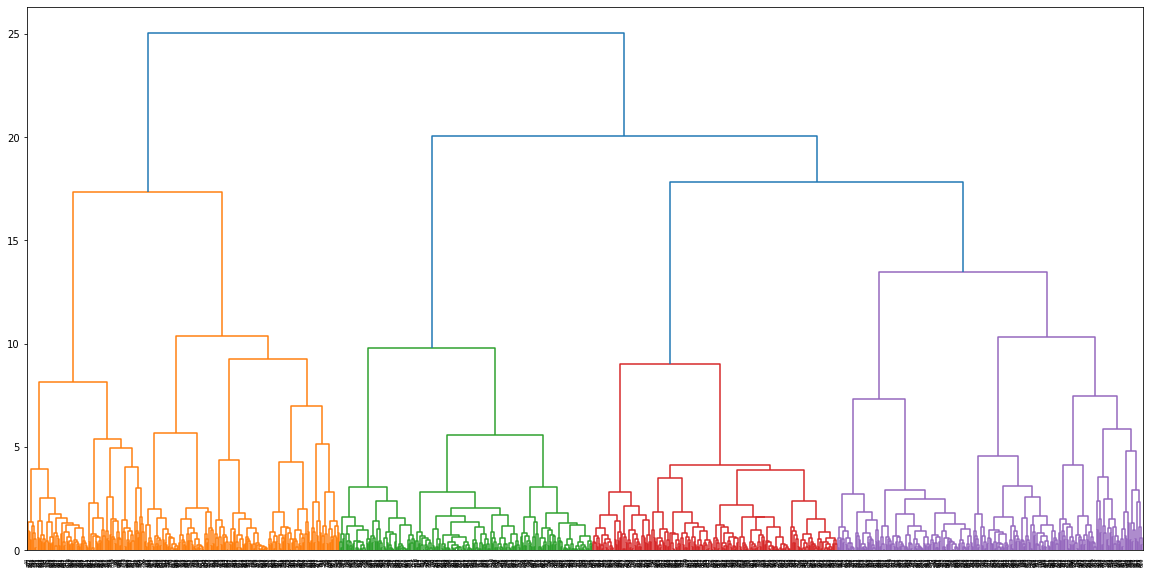

In [39]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

Построим график зависимости силуэтного коэффициента от числа кластеров

In [66]:
silhouette = []
for i in tqdm(range(2,12)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|██████████| 10/10 [00:00<00:00, 11.54it/s]


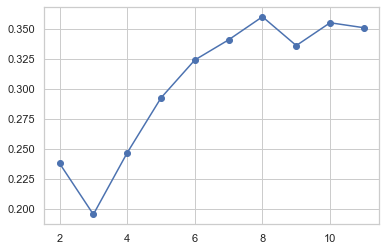

In [67]:
plt.plot(range(2,12), silhouette, marker='o');

Выберем 8 кластеров, визуализируем

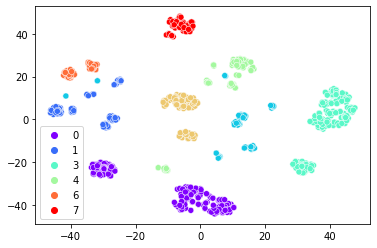

In [42]:
agg = AgglomerativeClustering(n_clusters=8).fit(X_scaled)
labels = agg.labels_
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

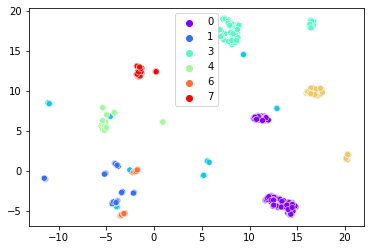

In [45]:
sns.scatterplot(X_umap[:,0], X_umap[:,1], hue=labels, palette='rainbow');

In [46]:
data['labels'] = labels
data['labels'].value_counts(normalize=True).sort_index()

0    0.227
1    0.112
2    0.076
3    0.219
4    0.105
5    0.122
6    0.063
7    0.076
Name: labels, dtype: float64

Аналогично KMeans покажем распределение значений в столбцах по кластерам

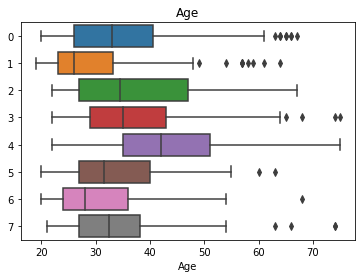

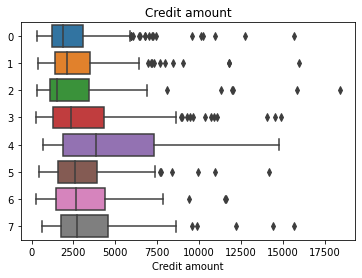

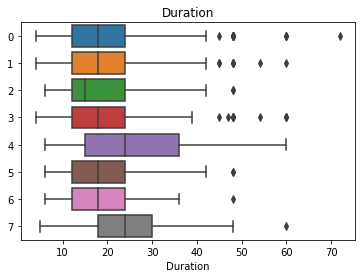

In [47]:
for col in ('Age','Credit amount','Duration'):
    sns.boxplot(data=data, x=data[col], y=labels, orient='h')
    plt.title(col)
    plt.show();

In [48]:
data[['Age','Credit amount','Duration','labels']].groupby('labels').median()

,Age,Credit amount,Duration
labels,,,
0,33.0,1898.0,18.0
1,26.0,2139.0,18.0
2,34.5,1523.0,15.0
3,35.0,2325.0,18.0
4,42.0,3844.0,24.0
5,31.5,2618.0,18.0
6,28.0,2631.0,18.0
7,32.5,2693.0,24.0


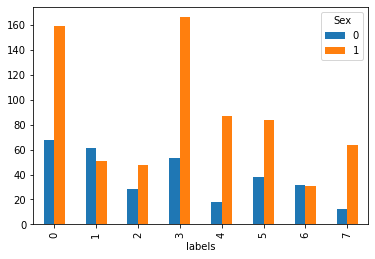

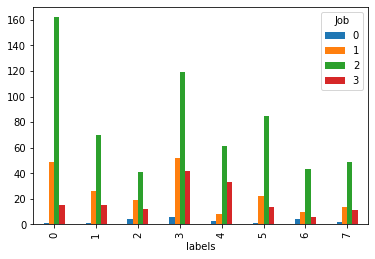

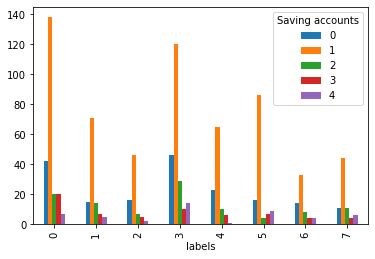

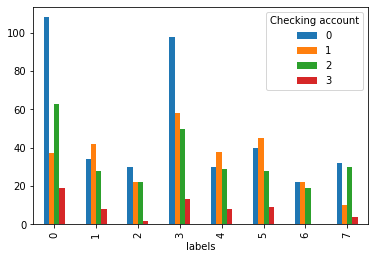

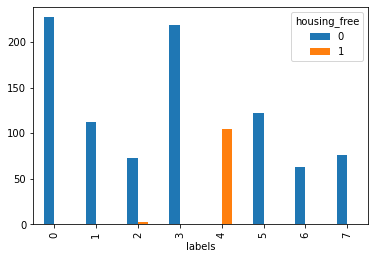

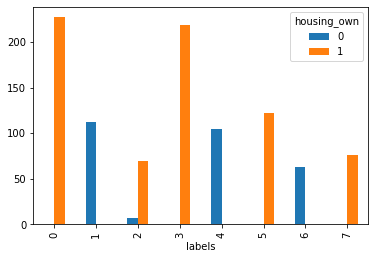

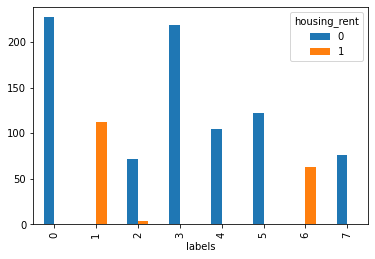

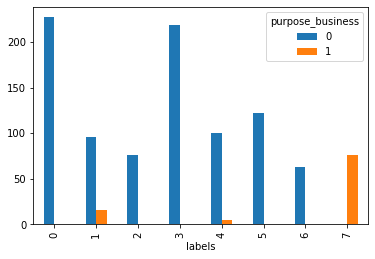

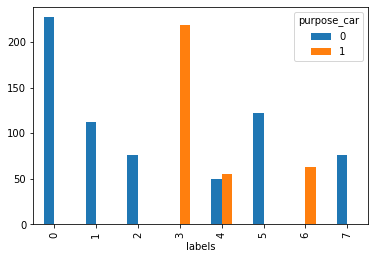

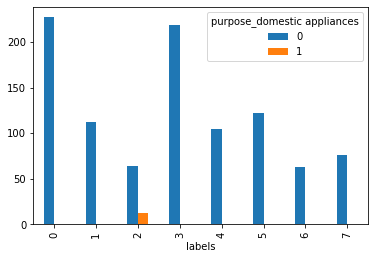

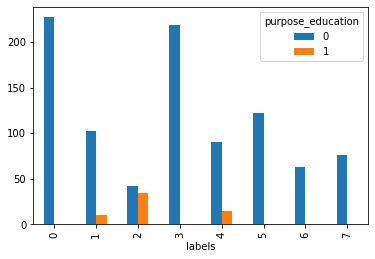

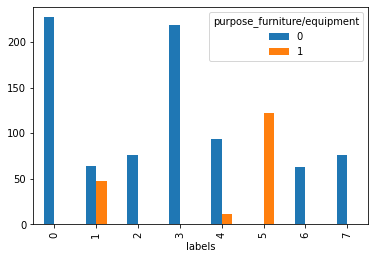

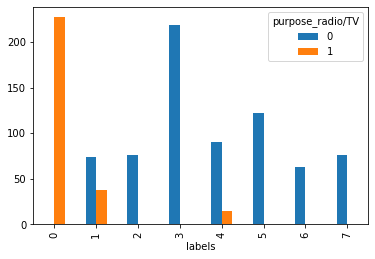

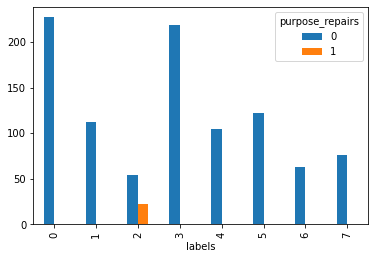

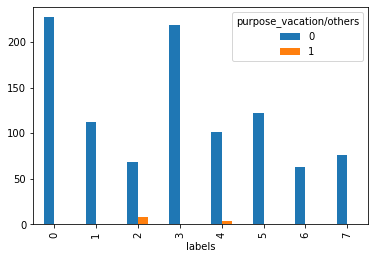

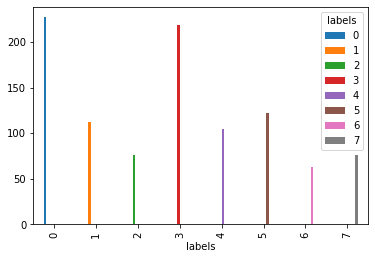

In [49]:
for col in data.columns.drop(['Age','Credit amount','Duration']):
    temp = data.groupby('labels')[col].value_counts().unstack()
    temp.plot.bar()

**Интерпретация иерархической кластеризации**

| Метка | Возраст | Пол | Работа | Жильё | Сбережения | Счёт | Размер кредита | Срок кредита | Цель кредита |
|-|-|-|-|-|-|-|-|-|-|
| 0 | 26—40 | Больше М | Норм. | Собственность | Норм. | Распр. 2 | 1900 | 18 | Радио / телевизор |
| 1 | 22—34 | Больше Ж | Норм. | Аренда | Норм. | Распр. 1 | 2100 | 18 | Разные |
| 2 | 26—46 | Больше М | Норм. | Собственность | Норм. | Распр. 3 | 1500 | 15 | Разные |
| 3 | 28—43 | Больше М | Норм. | Собственность | Особое | Распр. 3 | 2300 | 18 | Автомобиль |
| 4 | 35—51 | Больше М | Особое | Нет | Норм. | Распр. 1 | 3800 | 24 | Разные |
| 5 | 26—40 | Больше М | Норм. | Собственность | Особое | Распр. 1 | 2600 | 18 | Мебель |
| 6 | 23—36 | Больше Ж | Норм. | Аренда | Норм. | Распр. 1 | 2600 | 18 | Автомобиль |
| 7 | 27—38 | Больше М | Норм. | Собственность | Норм. | Распр. 2 | 2700 | 24 | Бизнес |

Работа:
* Норм.: распределение соответствует общему распределению выборки с преобладание квалифицированных работников
* Особое: в распределении преобладают квалифицированные работники, но по сравнению с другими метками сильно повышена доля высококвалифицированных

Сбережения:
* Норм.: распределение соответствует общему распределению выборки с преобладанием малого размера сбережений
* Особое.: распределение как нормальное, но с особо значимой долей высоких размеров сбережений

Счёт:
* Распр. 1: преобладает малый размер счёта, нулевых счетов чуть больше средних
* Распр. 2: преобладает нулевой размер счёта, средних больше чем малых
* Распр. 3: преобладает нулевой размер счёта, малых больше чем средних

**Характеристика меток**:

0. Собственники жилья среднего возраста, покупающие радио или телевизор
1. Молодые арендаторы жилья, как правило, женщины
2. Собственники жилья среднего возраста с уменьшенными размером и сроком кредита
3. Собственники жилья среднего возраста, покупающие автомобиль
4. Не имеющие жилья, среди которых много высококвалифицированных кадров, с большими размером и сроком кредита
5. Собственники жилья среднего возраста, покупающие мебель
6. Молодые арендаторы жилья, как правило, женщины, покупающие автомобиль
7. Собственники жилья среднего возраста, берущие кредит на развитие бизнеса

### DBScan

In [50]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

Построим график зависимости силуэтного коэффициента и числа кластеров от эпсилона (радиуса окрестности)

100%|██████████| 90/90 [00:09<00:00,  9.49it/s]


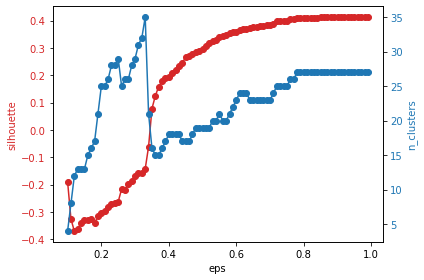

In [51]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 20/20 [00:02<00:00,  8.36it/s]


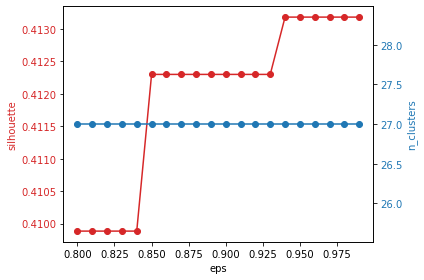

In [52]:
eps_range = np.arange(0.8,1.0,0.01)
dbscan_clustering(eps_range, X_scaled)

Оптимальные значения eps = 0.95, 27 кластеров

In [53]:
dbscan = DBSCAN(eps=0.95).fit(X_scaled)
labels = dbscan.labels_

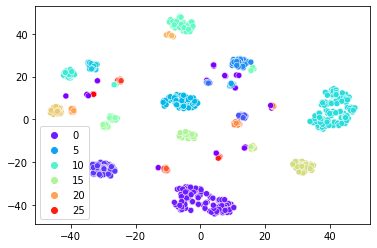

In [54]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

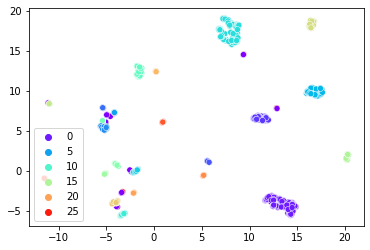

In [55]:
sns.scatterplot(X_umap[:,0], X_umap[:,1], hue=labels, palette='rainbow');

DBScan определил выбросы и поместил их в метку -1

In [56]:
data['labels'] = labels
data['labels'].value_counts(normalize=True).sort_index()

-1     0.038
 0     0.159
 1     0.068
 2     0.019
 3     0.010
 4     0.046
 5     0.011
 6     0.084
 7     0.031
 8     0.166
 9     0.032
 10    0.006
 11    0.064
 12    0.009
 13    0.023
 14    0.015
 15    0.038
 16    0.013
 17    0.053
 18    0.035
 19    0.012
 20    0.013
 21    0.015
 22    0.006
 23    0.013
 24    0.010
 25    0.006
 26    0.005
Name: labels, dtype: float64

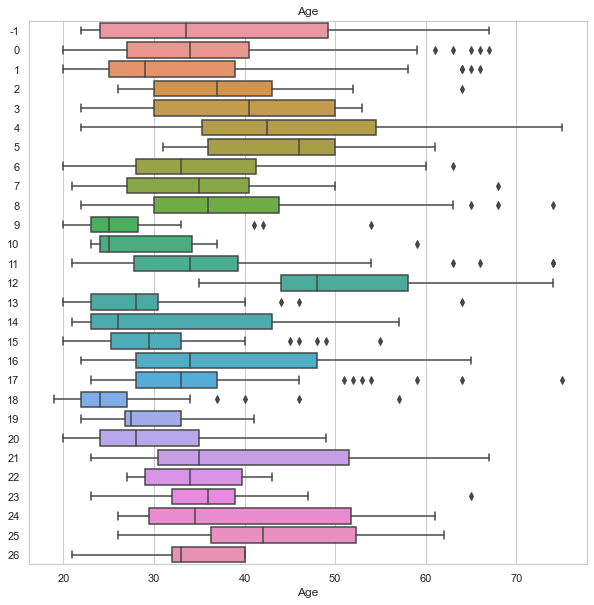

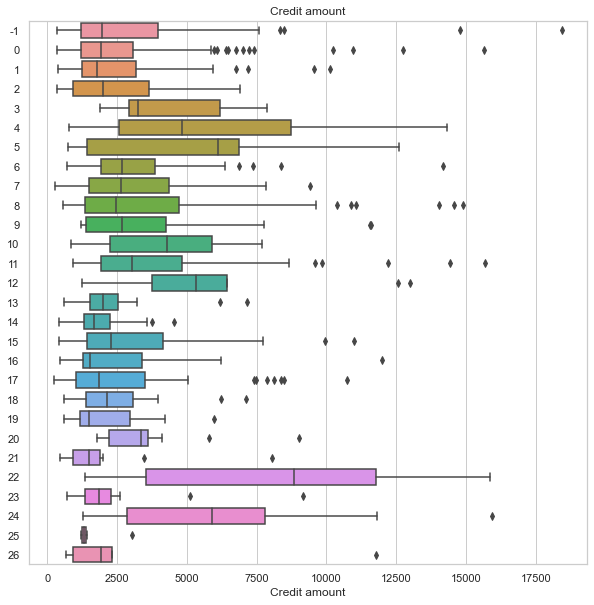

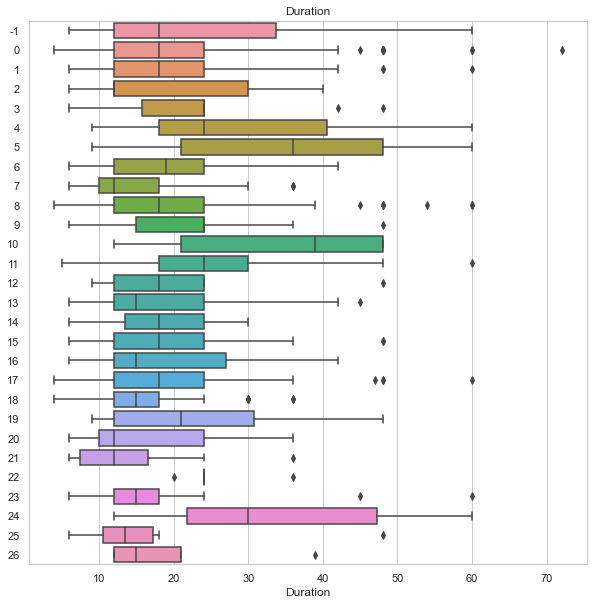

In [57]:
for col in ('Age','Credit amount','Duration'):
    plt.figure(figsize=(10,10))
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=data, x=data[col], y=labels, orient='h')
    plt.title(col)
    plt.show();

In [58]:
data[['Age','Credit amount','Duration','labels']].groupby('labels').median()

,Age,Credit amount,Duration
labels,,,
-1,33.5,1948.0,18.0
0,34.0,1919.0,18.0
1,29.0,1775.0,18.0
2,37.0,1977.0,12.0
3,40.5,3246.0,24.0
4,42.5,4833.0,24.0
5,46.0,6110.0,36.0
6,33.0,2683.5,19.0
7,35.0,2625.0,12.0


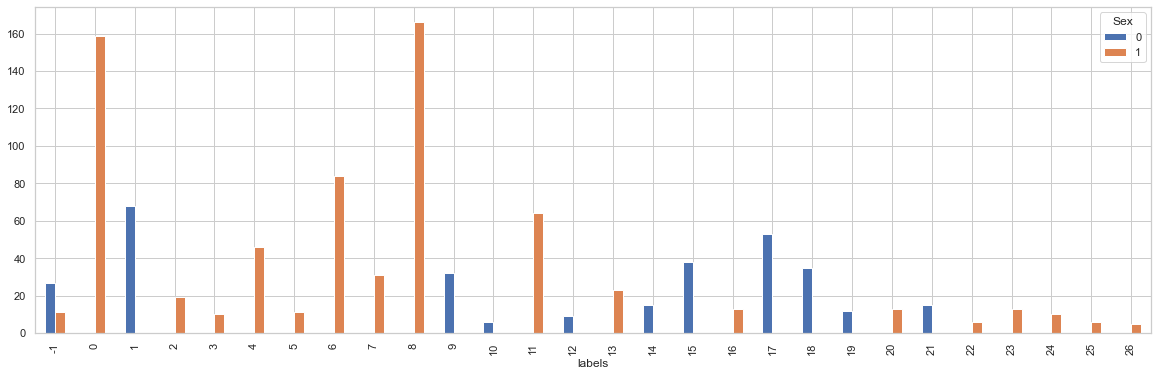

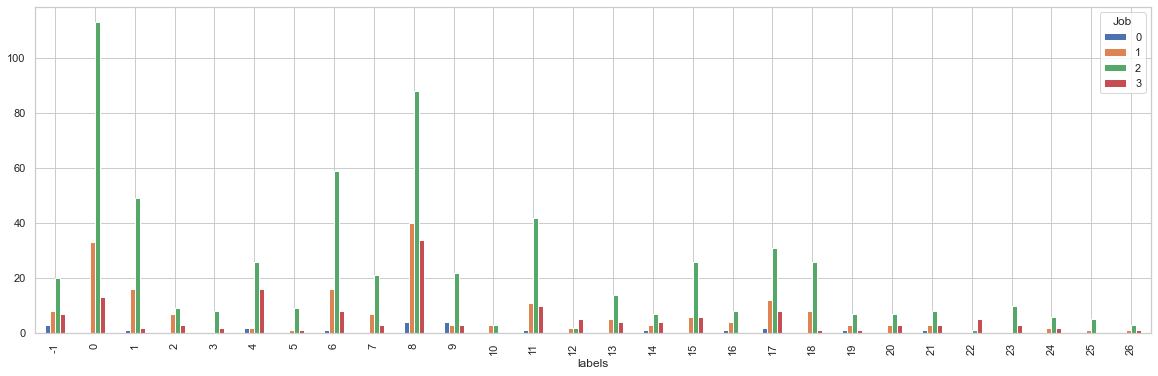

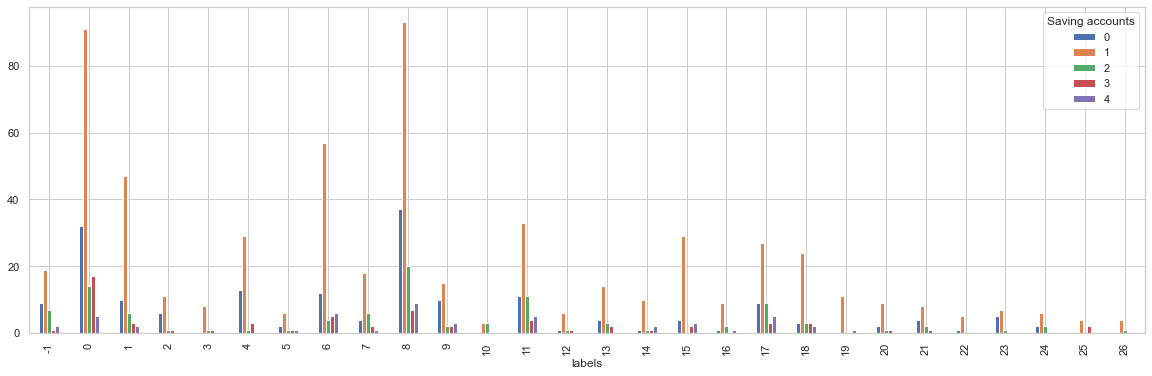

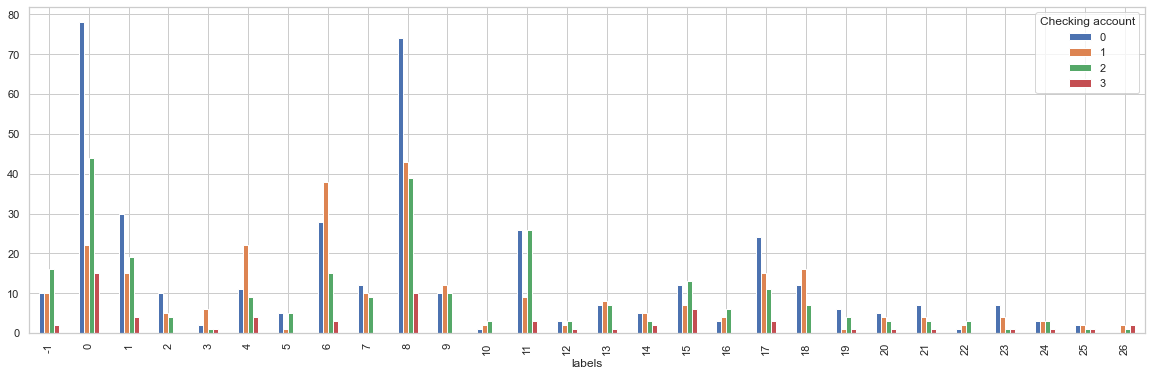

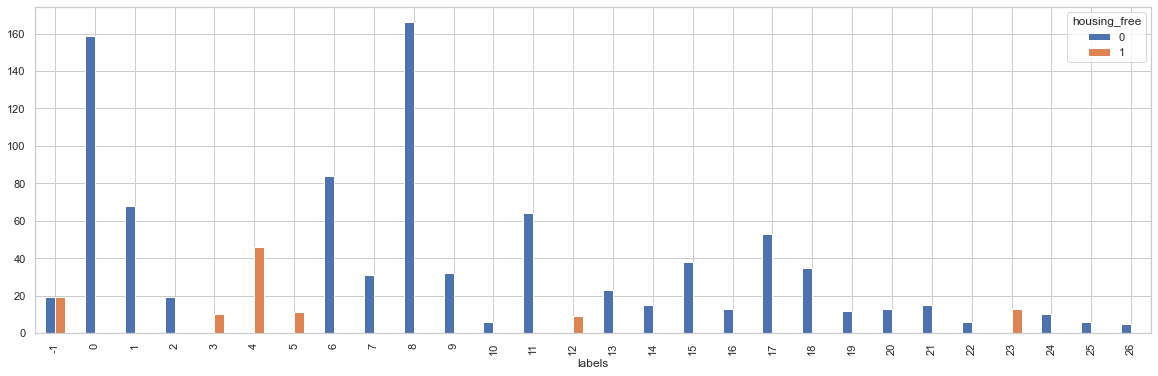

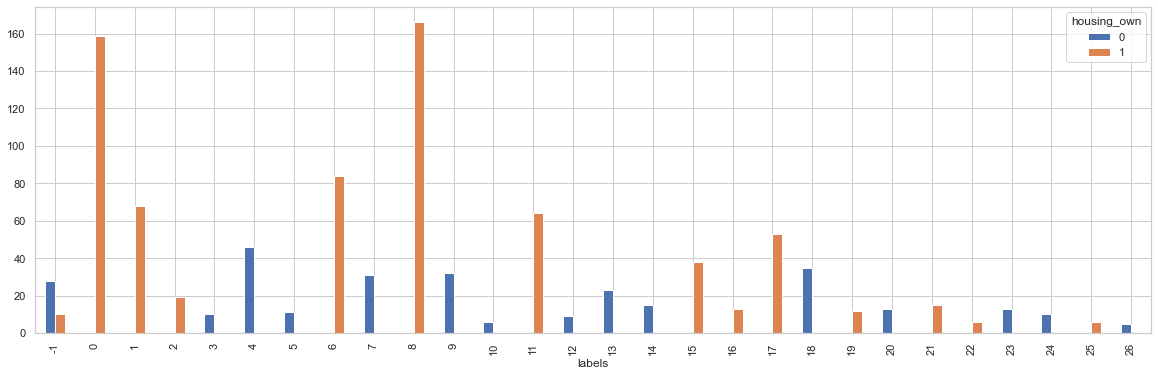

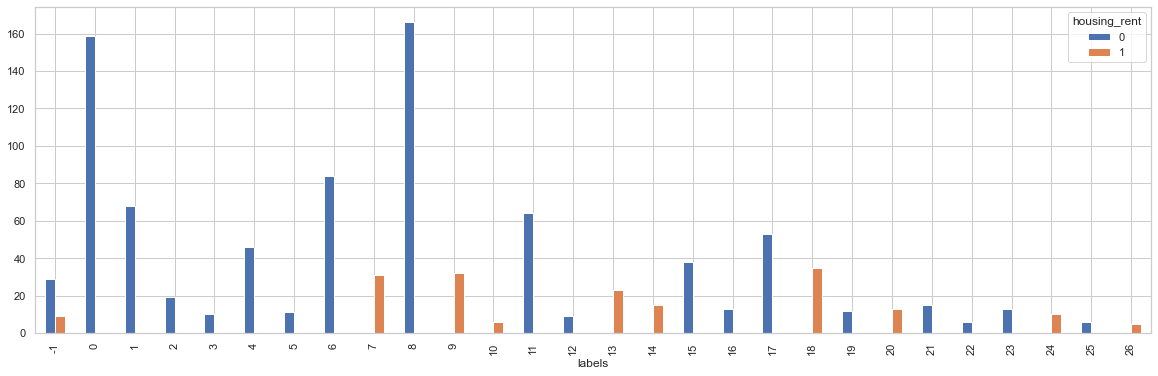

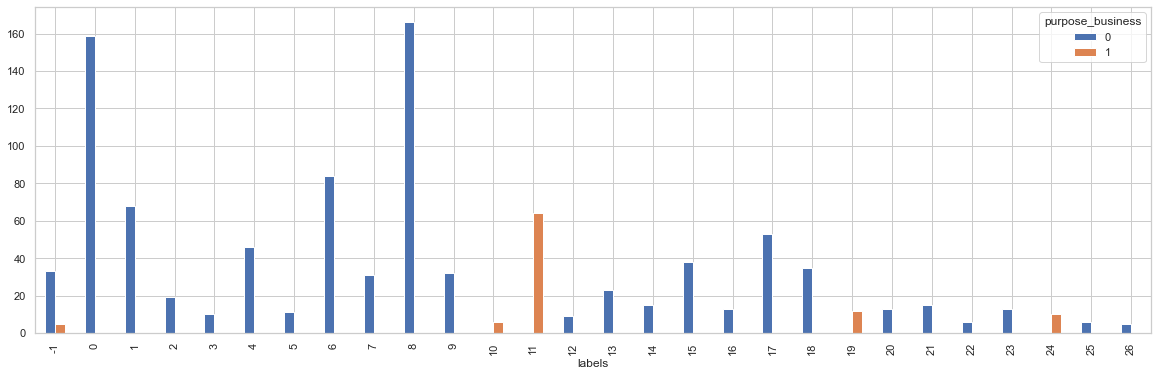

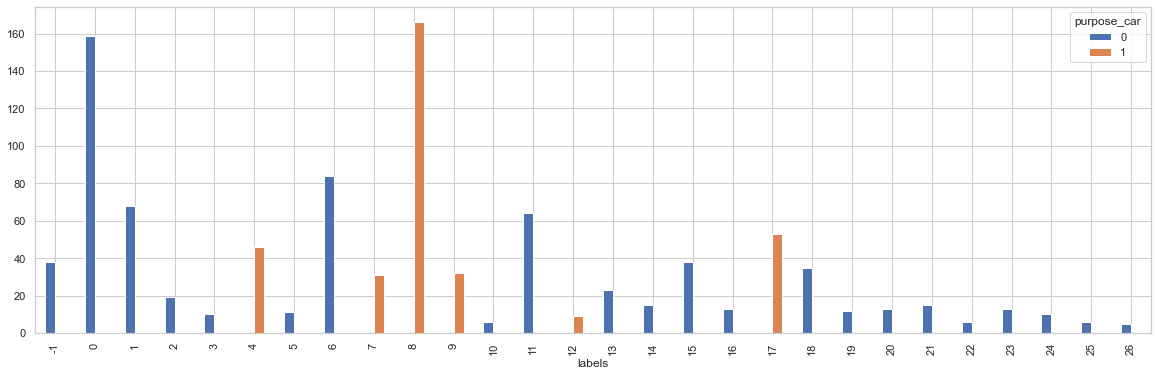

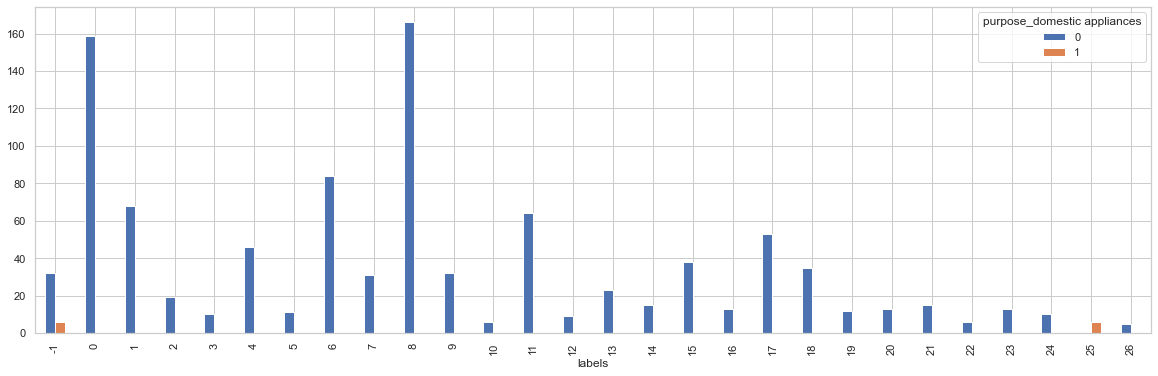

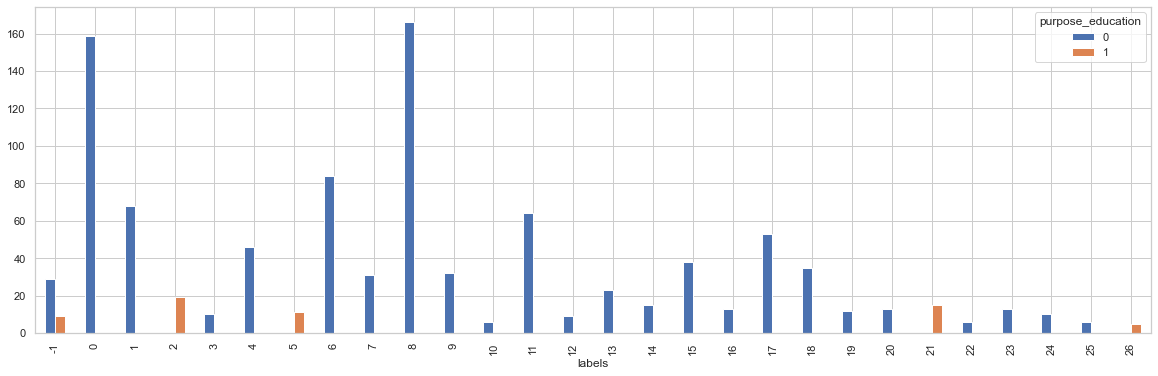

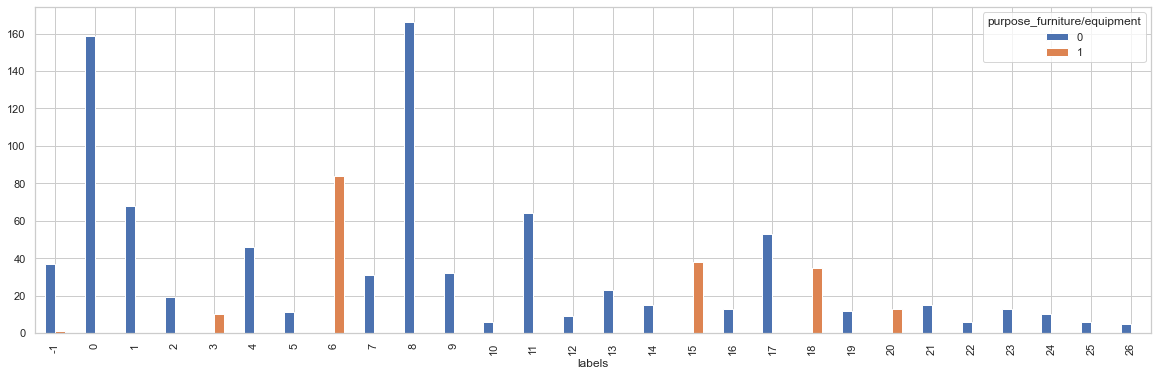

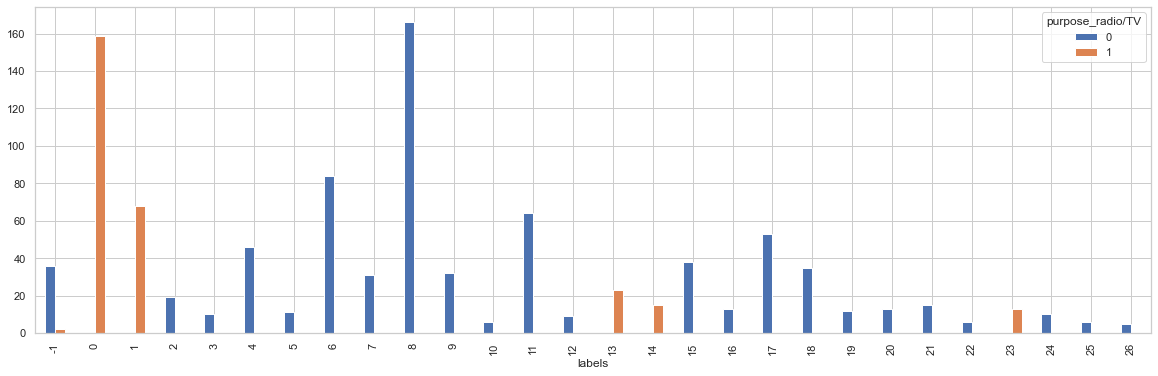

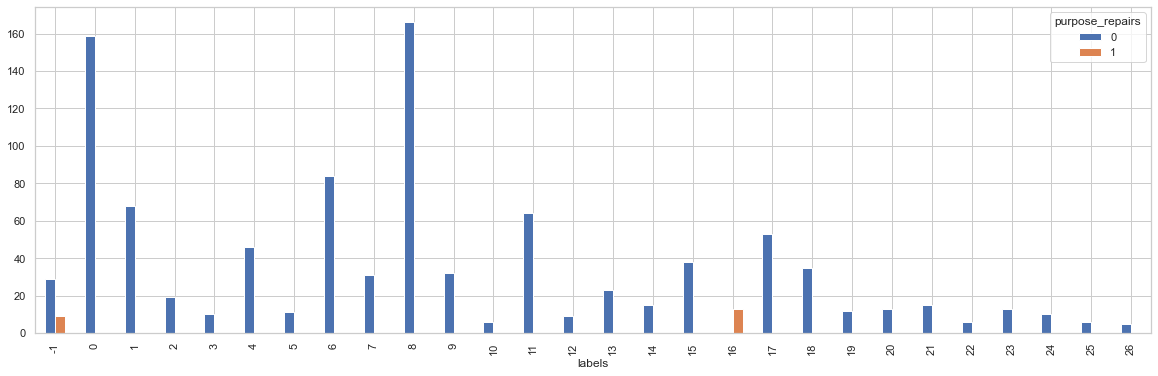

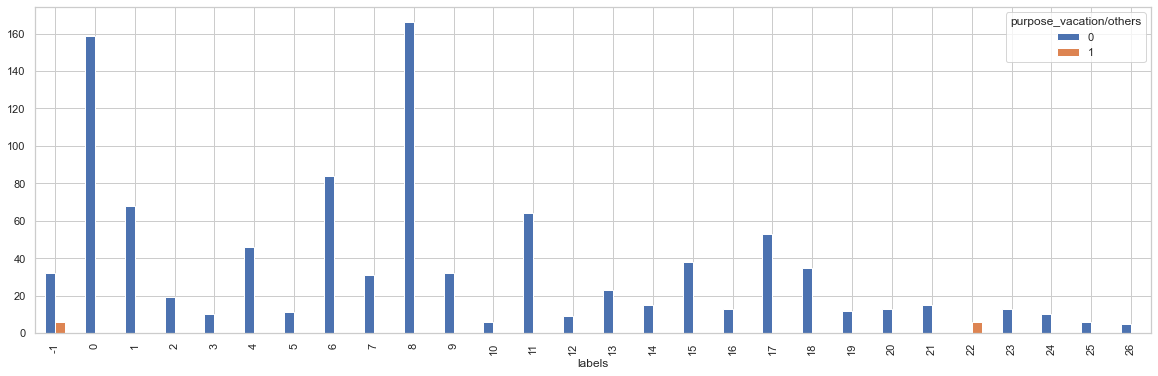

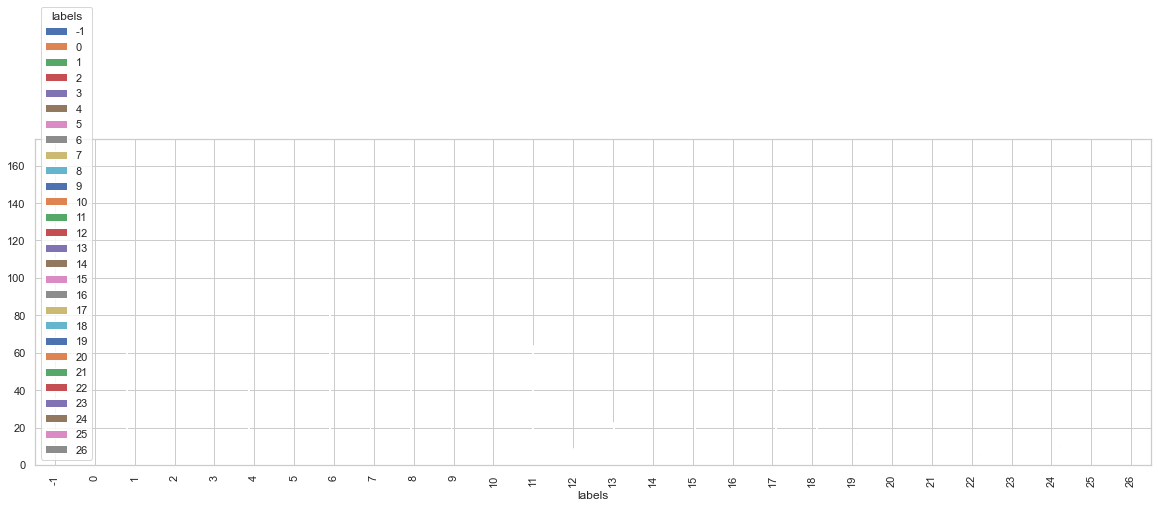

In [59]:
for col in data.columns.drop(['Age','Credit amount','Duration']):
    temp = data.groupby('labels')[col].value_counts().unstack()
    temp.plot.bar(figsize=(20,6))

**Интерпретация DBScan**

| Метка | Возраст | Пол | Работа | Жильё | Сбережения | Счёт | Размер кредита | Срок кредита | Цель кредита |
|-|-|-|-|-|-|-|-|-|-|
| -1 | 23—49 | >Ж | Норм. | Разные | Норм. | | 1900 | 18 | Разные
| 0 | 27—41 | М | Норм. | Собственность | Норм. | | 1900 | 18 | Радио/ТВ
| 1 | 25—38 | Ж | Норм. | Собственность | Норм. | | 1800 | 18 | Радио/ТВ
| 2 | 30—43 | М | Норм. | Собственность | Норм. | | 2000 | 12 | Образование
| 3 | 30—50 | М | Норм. | Нет | Норм. | | 3200 | 24 | Мебель
| 4 | 35—54 | М | Особое | Нет | Норм. | | 4800 | 24 | Автомобиль
| 5 | 35—50 | М | Норм. | Нет | Норм. | | 6100 | 36 | Образование
| 6 | 28—42 | М | Норм. | Собственность | Особое | | 2700 | 19 | Мебель
| 7 | 27—41 | М | Норм. | Аренда | Норм. | | 2600 | 12 | Автомобиль
| 8 | 30—44 | М | Норм. | Собственность | Особое | | 2500 | 18 | Автомобиль
| 9 | 23—28 | Ж | Норм. | Аренда | Особое | | 2700 | 24 | Автомобиль
| 10 | 24—34 | Ж | Норм. | Аренда | Норм. | | 4300 | 39 | Бизнес
| 11 | 27—39 | М | Норм. | Собственность | Особое | | 3000 | 24 | Бизнес
| 12 | 44—58 | Ж | Высок. | Нет | Норм. | | 5300 | 18 | Автомобиль
| 13 | 23—31 | М | Норм. | Аренда | Норм. | | 2000 | 15 | Радио/ТВ
| 14 | 23—43 | Ж | Особое | Аренда | Особое | | 1700 | 18 | Радио/ТВ
| 15 | 25—33 | Ж | Норм. | Собственность | Особое | | 2300 | 18 | Мебель
| 16 | 28—47 | М | Норм. | Собственность | Норм. | | 1500 | 15 | Ремонт
| 17 | 28—36 | Ж | Норм. | Собственность | Особое | | 1800 | 18 | Автомобиль
| 18 | 22—26 | Ж | Норм. | Аренда | Норм. | | 2100 | 15 | Мебель
| 19 | 26—33 | Ж | Норм. | Собственность | Норм. | | 1500 | 21 | Бизнес
| 20 | 24—34 | М | Норм. | Аренда | Норм. | | 3300 | 12 | Мебель
| 21 | 31—52 | Ж | Норм. | Собственность | Норм. | | 1500 | 12 | Образование
| 22 | 28—39 | М | Высок. | Собственность | Норм. | | 8800 | 24 | Отпуск
| 23 | 33-38 | М | Особое | Нет | Норм. | | 1800 | 15 | Радио/ТВ
| 24 | 29—52 | М | Норм. | Аренда | Норм. | | 5900 | 30 | Бизнес
| 25 | 36—53 | М | Норм. | Собственность | Норм. | | 1300 | 13 | Бытовая техника
| 26 | 32—40 | М | Норм. | Аренда | Норм. | | 1900 | 15 | Образование

Работа:
* Норм.: распределение соответствует общему распределению выборки с преобладание квалифицированных работников
* Особое: в распределении преобладают квалифицированные работники, но по сравнению с другими метками сильно повышена доля высококвалифицированных
* Высок.: в распределении сильно преобладают высококвалифицированные работники

Сбережения:
* Норм.: распределение соответствует общему распределению выборки с преобладанием малого размера сбережений
* Особое.: распределение как нормальное, но с особо значимой долей высоких размеров сбережений

**Характеристика меток**:

DBScan для разделения выбрал цель кредита, пол и тип жилья заёмщика

|Жильё|| Радио/ТВ || Мебель || Авто || Бизнес || Образование | Ремонт | Отпуск | Техника |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| |М|Ж|М|Ж|М|Ж|М|Ж|М|Ж|М|М|М|
|Собственность|0|1|6|15|8|17|11|19|2|21|16|22|25
|Аренда|13|14|20|18|7|9|24|10|26| | | | |
|Нет|23| |3| |4|12| | |5| | | | |

In [70]:
pip install MulticoreTSNE

  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
  Running setup.py clean for MulticoreTSNE
Failed to build MulticoreTSNE
    Running setup.py install for MulticoreTSNE: started
    Running setup.py install for MulticoreTSNE: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\andsi\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\andsi\\AppData\\Local\\Temp\\pip-install-jlks493h\\multicoretsne\\setup.py'"'"'; __file__='"'"'C:\\Users\\andsi\\AppData\\Local\\Temp\\pip-install-jlks493h\\multicoretsne\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\andsi\AppData\Local\Temp\pip-wheel-dynvvdgu'
       cwd: C:\Users\andsi\AppData\Local\Temp\pip-install-jlks493h\multicoretsne\
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\MulticoreTSNE
  copying MulticoreTSNE\__init__.py -> build\lib.win-amd64-3.8\MulticoreTSNE
  creating build\lib.win-amd64-3.8\MulticoreTSNE\tests
  copying M